<a href="https://colab.research.google.com/github/Mohammed-Salman-Fadel/House-Pricing-Predictor/blob/main/House_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [ ]:
df = pd.read_csv("housing.csv")
df.info() # Missing data in "total_bedrooms" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dropna(inplace=True) # All rows with missing values will be dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Data Visualisation

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11592,-118.04,33.78,26.0,3642.0,557.0,1623.0,569.0,5.8426,<1H OCEAN,259400.0
15770,-122.44,37.76,38.0,2202.0,452.0,833.0,435.0,6.8939,NEAR BAY,455900.0
15101,-116.97,32.83,17.0,6659.0,1402.0,3183.0,1378.0,2.9490,<1H OCEAN,117300.0
6289,-117.91,34.04,15.0,8749.0,1761.0,5278.0,1691.0,4.6324,<1H OCEAN,168800.0
16550,-121.23,37.82,8.0,1289.0,235.0,867.0,239.0,4.6821,INLAND,138500.0
...,...,...,...,...,...,...,...,...,...,...
344,-122.18,37.75,43.0,1036.0,233.0,652.0,213.0,2.0690,NEAR BAY,84600.0
7465,-118.20,33.93,40.0,1929.0,417.0,1780.0,419.0,3.4402,<1H OCEAN,149400.0
19736,-121.78,40.12,14.0,388.0,108.0,35.0,17.0,6.1359,INLAND,106300.0
9330,-122.50,37.96,16.0,100.0,20.0,45.0,25.0,6.1359,NEAR BAY,212500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

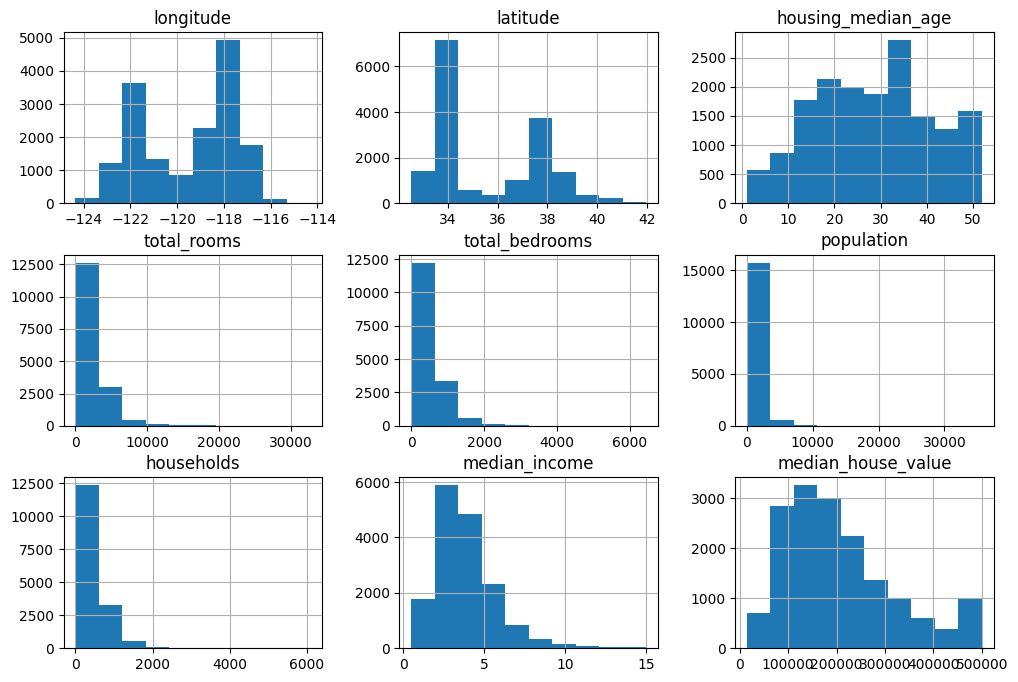

In [ ]:
train_data.hist(figsize=(12, 8))

<Axes: >

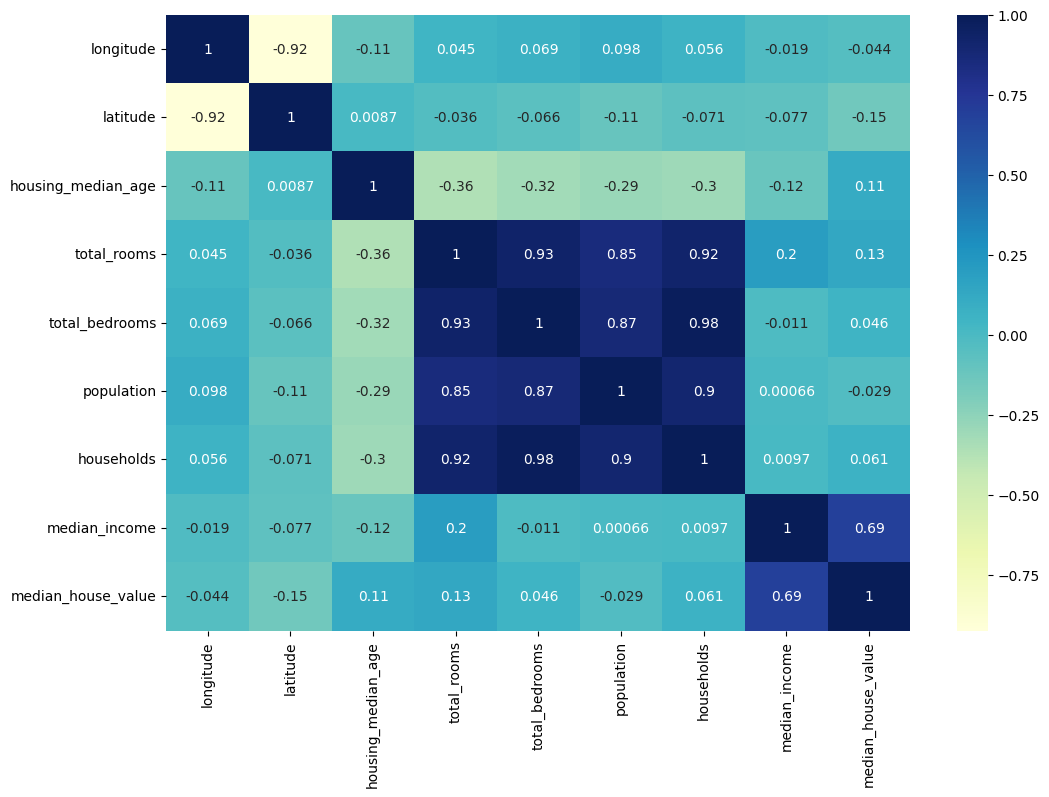

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True, cmap="YlGnBu")

## Data Preprocessing

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

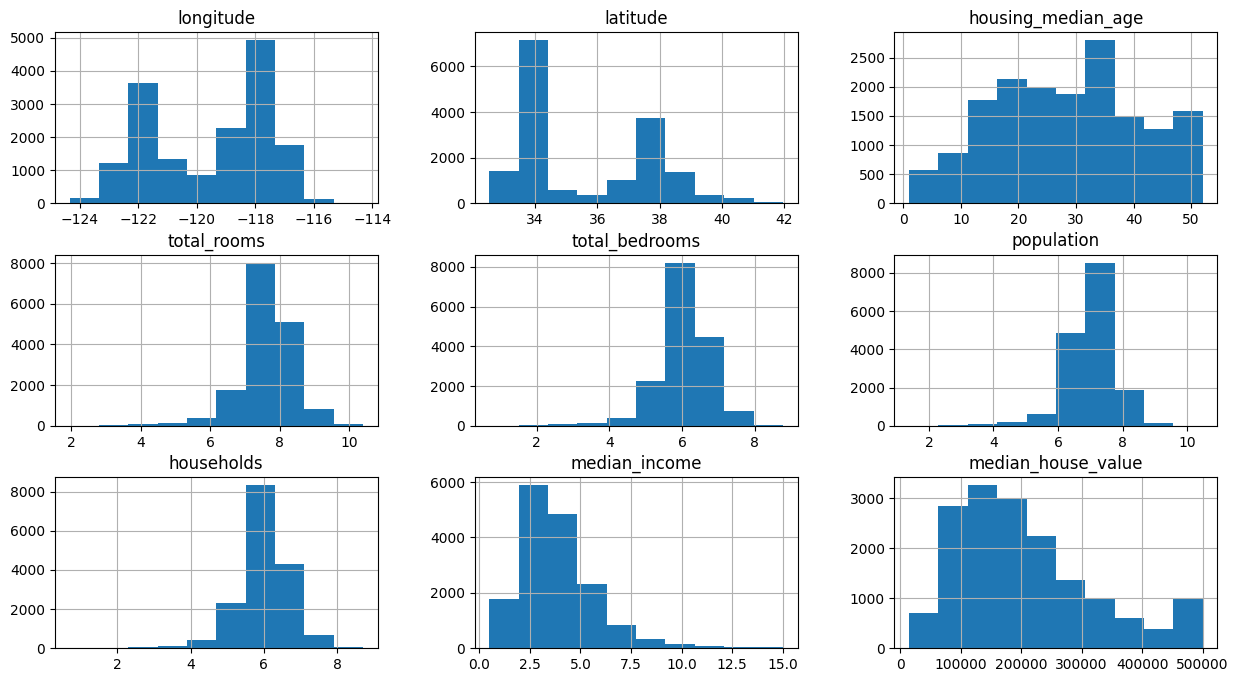

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize = (15, 8))

In [ ]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7201
INLAND,5228
NEAR OCEAN,2104
NEAR BAY,1810
ISLAND,3


In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

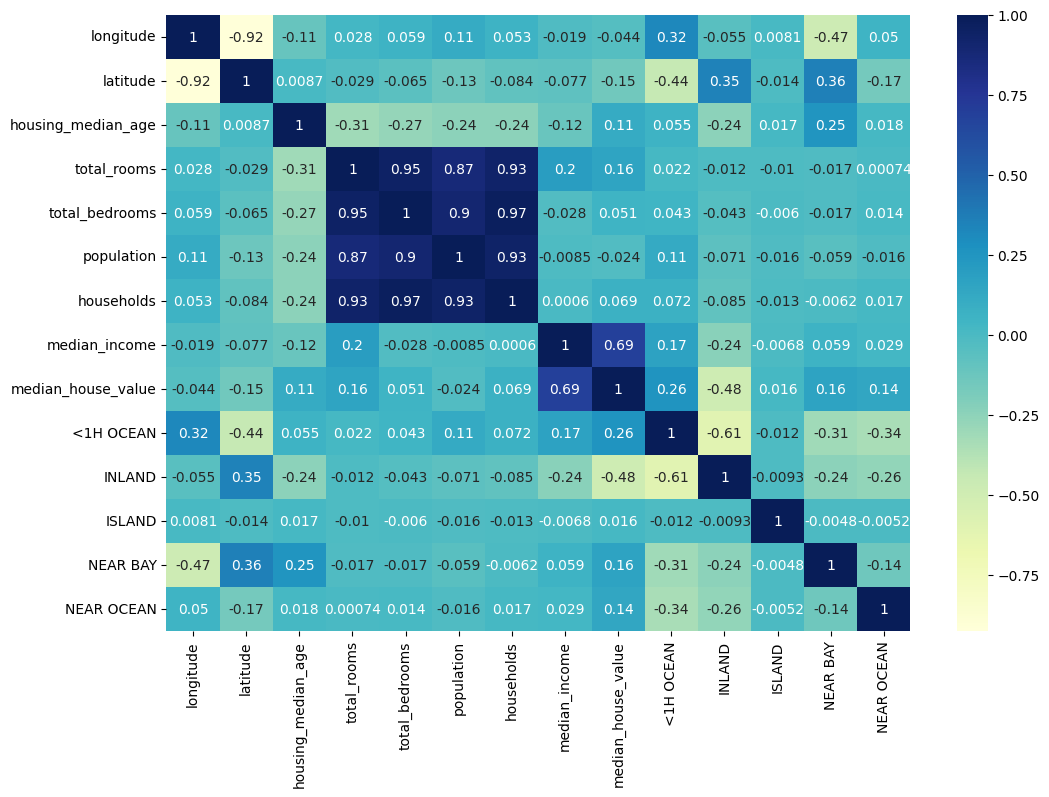

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

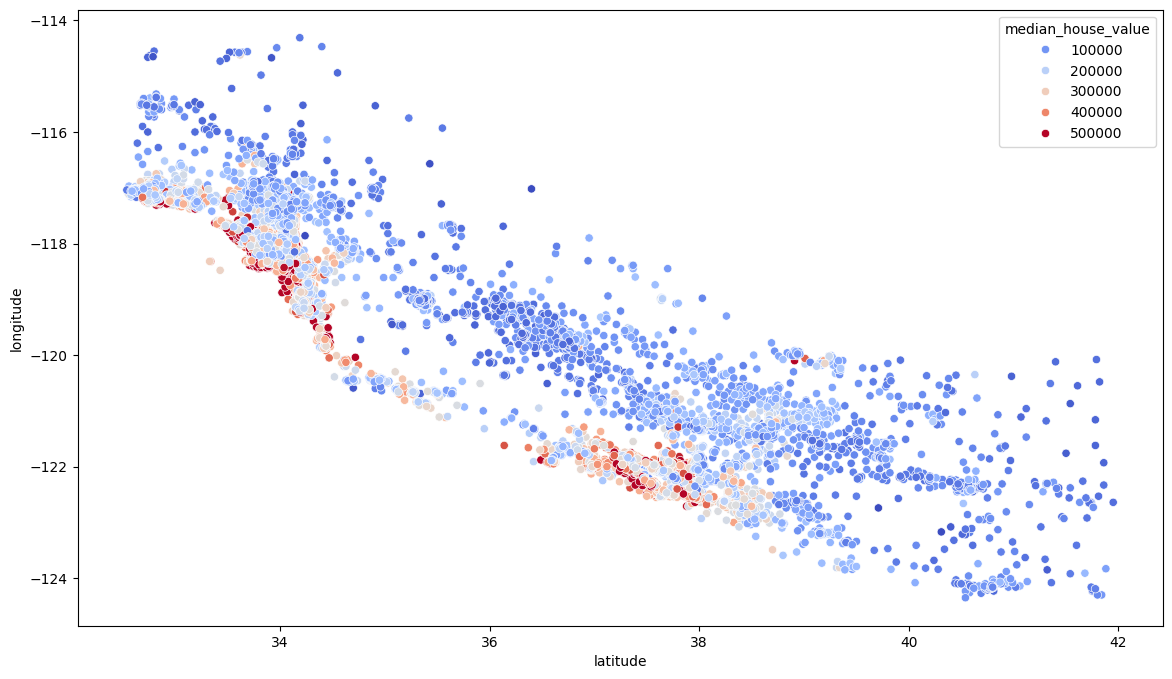

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='latitude', y='longitude', data = train_data, hue='median_house_value', palette="coolwarm") # Shows how houses near water is more expensive

## Feature Engineering

In [ ]:
# Creating new potentially important features
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] /train_data['households']

<Axes: >

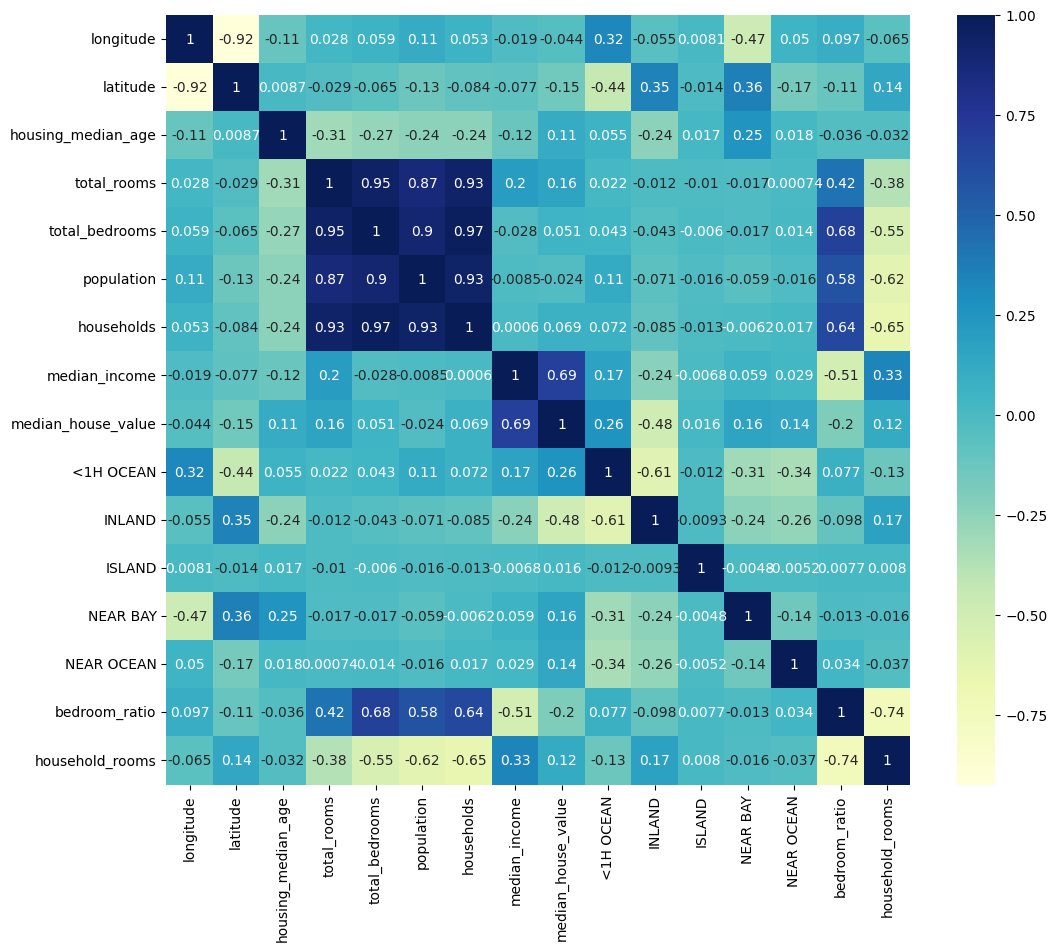

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Training our model using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] /test_data['households']

In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test_s, y_test)

0.6654525384042436

## Training our model using Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, y_test) # Much more accurate results

0.8143115347113273

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)

0.8122708492015606